In [1]:
import numpy as np
import sympy as sym
import soundfile as sf
import matplotlib.pyplot as plt
import simpleaudio as sa
import sounddevice as sd
from scipy.signal import iirfilter, sosfreqz, sosfilt, freqs, hilbert, fftconvolve, lfilter, medfilt
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import write

In [2]:
def sine_sweep(f1, f2, T, fs = 44100):
    
    """Función para generar un sine sweep logaritmico y su correspondiente filtro inverso, la misma los reproducirá y
       graficará sus forma de onda en un mismo grafico.
       
       PARAMETROS:
    
       f1 : frecuencia inicial 
       f2 : frecuencia final 
       T :  duración del barrido en segundos
       fs : samplerate, por default 44100. """

    
    w1 = 2 * np.pi * f1 
    w2 = 2 * np.pi * f2  

    nx = round(T * fs) 
    t = np.linspace(0,T,nx) 
    k = (T*w1)/np.log(w2/w1)
    l = T/np.log(w2/w1)
    sine_sweep = np.sin(k*(np.exp(t/l)-1))


    audio_sine_sweep = sine_sweep * (2**15 - 1) / np.max(np.abs(sine_sweep)) #normalizado del audio
    audio_sine_sweep = audio_sine_sweep.astype(np.int16) #convierte el archivo a 16-bit 

    sf.write("sine_sweep.wav", audio_sine_sweep, fs)
    
    #REPRODUCIR SINE_SWEEP.WAV
    data1, samplerate = sf.read("sine_sweep.wav")
    sd.play(data1, fs)
    status = sd.wait()

    #DEFINO filter_inv
    w = (k/l) * np.exp(t/l)
    m = w1/(2*np.pi*w)
    filter_inv = m * np.flip(sine_sweep)

    audio_filter_inv = filter_inv* (2**15 - 1) / np.max(np.abs(filter_inv)) #normalizado del audio
    audio_filter_inv = audio_filter_inv.astype(np.int16) #convierte el archivo a 16-bit data 

    sf.write("filter_inv.wav",audio_filter_inv, fs)

    #REPRODUCIR filter_inv.wav
    data2, samplerate = sf.read("filter_inv.wav")
    sd.play(data2, fs)
    status = sd.wait()
    
    print("-"*60)
    print("waiting...")
    print("-"*60)


    #PLOTEAR SINE_SWEEP.WAV
    plt.rcParams['figure.figsize'] = (40, 5) # set plot size
    plt.plot(t,data1/(2.**15))


    #PLOTEAR filter_inv.wav
    plt.rcParams['figure.figsize'] = (40, 5) # set plot size
    plt.plot(t,data2/(2.**15))


    #TITULOS DEL PLOT
    plt.title('Forma Onda',size=16);
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [int16]")
    
    return


#HAY QUE GRAFICAR LA FFT CON AUDACITY!!!!!!!!

------------------------------------------------------------
waiting...
------------------------------------------------------------


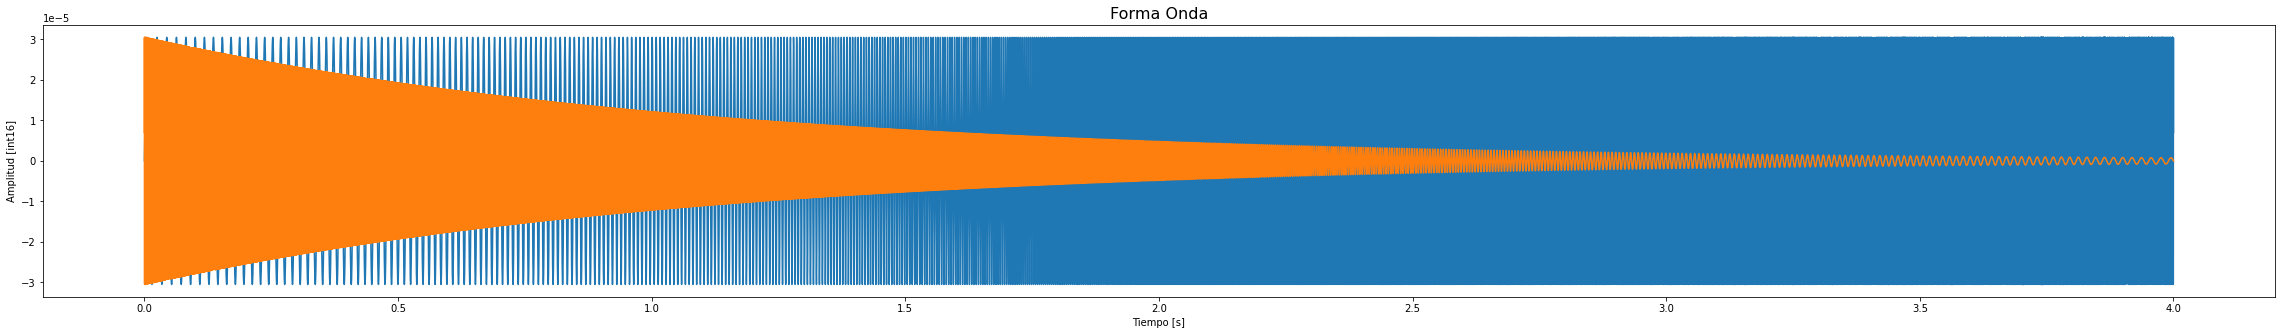

In [3]:
sine_sweep(50,2000,4)

In [4]:
def visual_wave_audio(audio, dimension=(15,5)):
    
    """Función para visualizar la forma de onda de un archivo de audio.
    
        PARAMETROS:
        
        audio : indicar la ruta del archico de audio a analizar
    
        dimension : indicar las dimensiones del grafico (base,altura), por default es (15,5)"""
  
    
    
    audioData, fs = sf.read(audio)
    
    length = audioData.shape[0]/fs
    t = np.linspace(0.,length,audioData.shape[0])
    
    plt.rcParams["figure.figsize"] = dimension
    plt.plot(t,audioData/(2.**15))
    plt.title('Forma de Onda',size=16);
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [int16]")
    return

In [5]:
def visualizar_datos(audio,dimension=(15,5),k=0,j=0):
    
    '''Esta funcion grafica la forma de onda de un archivo tipo .wav y devuelve 
       el valor maximo, minimo y promedio de dicha señal.
    
       audio : indicar el la ruta del archivo .wav 
       
       dimension : indicar las dimensiones del grafico (base,altura), por default (15,5).
       
       k: corrección de error, por default 0
       j: corrección de error, por default 0
       
       OBS! si se arroja el siguiente error: ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)
       
       coloque los siguientes valores:
       k=1 si el error corresponde a la fila 56
       j=1 si el error corresponde a la fila 57'''
    
    
    
    audioData, fs = sf.read(audio)
    
    
    length = audioData.shape[0] / fs
    t = np.linspace(0., length, audioData.shape[0])
    max_val = np.amax(audioData)
    min_val = np.amin(audioData)
    
    print("el maximo valor es: ", max_val / (2.**15))
    print("el minimo valor es: ", min_val / (2.**15))
    
    
    max_index = np.where(audioData == max_val)
    min_index = np.where(audioData == min_val)
    
    #correccion de error
    if k == 1:
        for n in range(len(max_index)):
            max_index = np.delete(max_index,n)
    if j == 1:
        for i in range(len(min_index)):
            min_index = np.delete(min_index,i)
    else: 
        pass
  

       
                                     
    max_val_arr = np.array(max_val/ (2.**15 -1)) #for i in range(len(max_index))])) 
    min_val_arr = np.array(min_val/ (2.**15)) #for i in range(len(min_index))]))                                 
                                     
                                     
    
    average = np.average(audioData)/ (2.**15) #esto me calcula el promedio ponderado a lo largo de audiodata 
    print("el valor promedio de la señal es: ", average)
    
    print("-"*50)
    print("wainting")
    print("-"*50)
    
    plt.rcParams['figure.figsize'] = dimension #defino dimensiones del grafico
    plt.plot(t, audioData / (2.**15)) #ploteo la "forma de onda" de la señal
    
    plt.plot(t[max_index],max_val_arr,'.r') # plotea el valor maximo
    plt.plot(t[min_index],min_val_arr,'.r') # plotea el valor minimo
    
    
    plt.axhline(y=average, linestyle=':', color = "red") 
    
    
    plt.title('Audio Waveform',size=16);
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [int16]")
    return 


In [6]:
def plot_frec(txt,dimension=(15,5)):
    
    """" Función para graficar archivo .txt del software Audacity, 
         correspondiente al espectro de frecuencia de una señal de audio.
         
         PARAMETROS: 
         
         txt : ingrese la ruta del archivo .txt
         dimension : ingrese dimensiones de base y altura del grafico a realizar."""
    
    
    with open(txt) as f_input:

        text = [l.replace(",", ".") for l in f_input]

    # Creo un array con los pares ordenados 
    data = np.loadtxt(text, skiprows=1)

    frecuencia, nivel = data.T
    plt.rcParams["figure.figsize"] = dimension
    plt.plot(frecuencia,nivel)
    plt.title('Dominio espectral')
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Nivel [dB]")
    
    return 

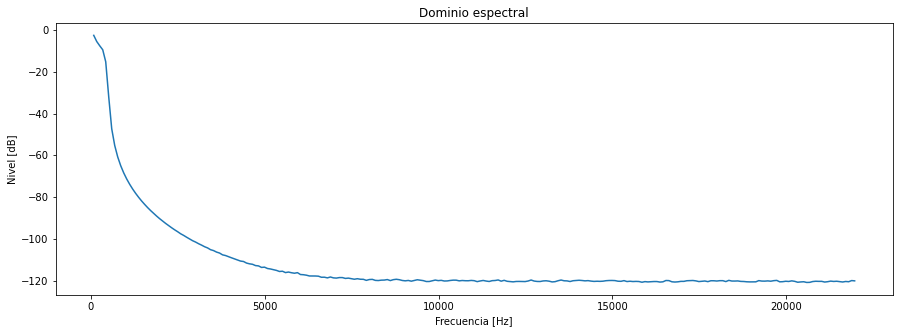

In [8]:
plot_frec("espectro.txt")

In [9]:
def ruido_rosa(T, fs=44100):
    
    
    """Función para crear ruido rosa, la misma lo reproducira y graficará su forma de onda.
       
       PARAMETROS:
    
       T : ingrese la duración en segundos.
       fs : samplerate, por default 44100."""
    
    
    from scipy import signal
    nx = T*fs 

    #coeficientes del filtro 
    B = np.array([0.049922035, -0.095993537, 0.050612699, -0.004408786]) 
    A = np.array([1, -2.494956002, 2.017265875, -0.522189400])

    nt60 = int(np.round(np.log(1000)/1-max(np.abs(np.roots(A))))) #estimacion del periodo transitorio

    v = np.random.randn(nx + nt60) #ruido blanco

    x = signal.lfilter(B, A, v, axis = 0) 

    pink_noise = x[nt60:len(x)]
    
    audio_pink_noise = pink_noise* (2**15 - 1) / np.max(np.abs(pink_noise)) #normalizado del audio
    audio_pink_noise = audio_pink_noise.astype(np.int16) #convierte el archivo a 16-bit data

    sf.write("pink_noise.wav", pink_noise, fs)
    
    #REPRODUCIR "pink_noise.wav"
    data3, samplerate = sf.read("pink_noise.wav")
    sd.play(data3, samplerate)
    status = sd.wait()

    print("-"*60)
    print("waiting...")
    print("-"*60)
    
    #PLOTEAR "pinkNoise.wav" CON RESPECTO EL TIEMPO
    plt.rcParams['figure.figsize'] = (10, 5) # set plot size
    t = np.linspace(0,T,nx) # el t va a ser un corrimiento que empeiza en 0, termina en t y lo hace de a pasos de la cantidad de muestras que hay, osea nx
    plt.plot(t, data3/(2.**15))
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [dB] (int16)")
   

    return

------------------------------------------------------------
waiting...
------------------------------------------------------------


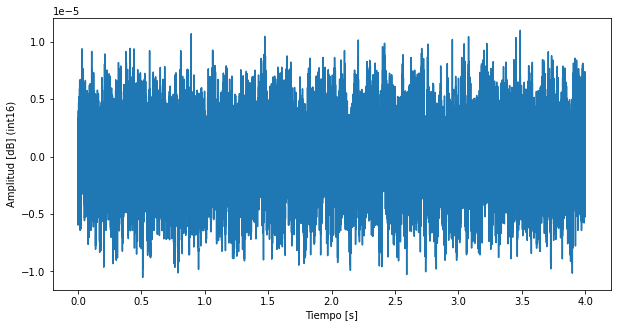

In [10]:
ruido_rosa(4)

In [11]:
plot_frec("espectro_noise_pink")

In [12]:
def reproducir_audio(audio):
    
    """Función para reproducir audio.
    
    PARAMETROS:
    
    audio: ruta del archivo de audio."""
    
    
    data1, fs = sf.read(audio)
    sd.play(data1, fs)
    status = sd.wait()
    return

In [13]:
reproducir_audio('pink_noise.wav')

In [14]:
# A PARTIR DE ACA ABAJO SEGUNDA ENTREGA 

In [15]:
def carga_datas_wav(audio):
    
    '''Esta funcion permite importar la información archivos .wav y
    almacenar los datos en una lista.
    
    devuelve array 
    
    PARAMETROS:
    
    audio: ruta del archivo de audio.'''
    
    base_data, fs = sf.read(audio)
    
    print("LISTO PARA UTILIZAR")
    
    return  base_data


In [16]:
base_data3 = carga_datas_wav('ir_centre_stalls.wav')
base_data4 = carga_datas_wav("impulseresponseheslingtonchurch-001.wav")

LISTO PARA UTILIZAR
LISTO PARA UTILIZAR


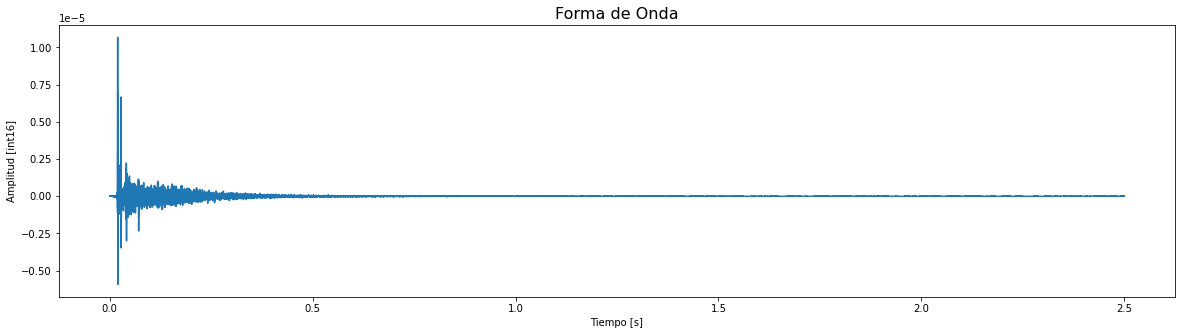

In [17]:
visual_wave_audio("ir_centre_stalls.wav",(20,5))

el maximo valor es:  8.05780291557312e-06
el minimo valor es:  -4.32133674621582e-06
el valor promedio de la señal es:  -1.3023029199082656e-12
--------------------------------------------------
wainting
--------------------------------------------------


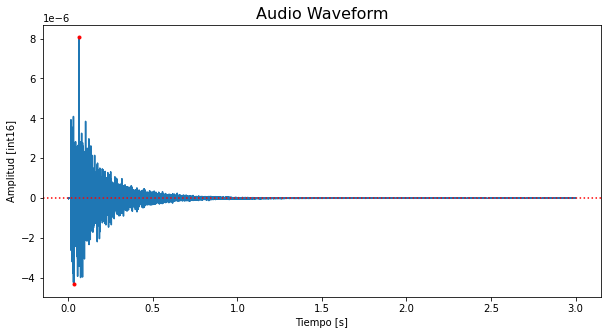

In [18]:
visualizar_datos("impulseresponseheslingtonchurch-001.wav",(10,5))

In [19]:
def respuesta_impulso(ancho_banda, t60, t, fs = 44100):
    
    """" Función para sintetizar una respuesta al impulso.
    
    PARAMETROS:
    
    Ancho_banda: "octava" o "tercio de octava"indica la cantidad de frecuencias centrales que se tendrán en cuenta para la sintetización.
    
    t60: indicar los valores de Rt60 para cada frecuencia central.
    
    t: duración de la respuesta al impulso.
    
    fs: samplerate, por default 44100."""
    
    
    if ancho_banda == "octava":
        central_freqs = [31.25, 62.5, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]
    
    elif ancho_banda == "tercio de octava":
        central_freqs = [19.69, 24.8, 31.25, 39.37, 49.61, 62.5, 78.75, 99.21, 125, 157.5, 198.4, 250, 315, 396.9, 500, 630, 793.7, 1000, 1260, 1587, 2000, 2520, 3175, 4000, 5040, 6350, 8000, 10079, 12699, 16000, 20159]
   
    ns = t * fs
    T = np.linspace(0, t, ns)
    ai = 1
    pi_i = [] #decaimineto exponencial 
      
    for i in range (0,len(central_freqs)):
        #pi_i.append(t60[i]/(np.log(10 ** -3)))
        pi_i.append((np.log(10 ** -3)/t60[i]))

    
        RI_OK = np.empty(1)
    for i in range(len(central_freqs)):
        #RI_OK = RI_OK + (ai * np.exp(pi_i[i] * T) * np.cos(2 * np.pi * central_freqs[i] * T))
        RI_OK = RI_OK + (ai * np.exp(pi_i[i] * T) * np.cos(2 * pi_i[i] * central_freqs[i] * T))
   
   
    
    #convierte en audio .wav
    audio_RI = RI_OK* (2**15 - 1) / np.max(np.abs(RI_OK)) #normalizado del audio
    audio_RI = audio_RI.astype(np.int16) #convierte el archivo a 16-bit data

    sf.write("audio_RI.wav", audio_RI, fs)
    

    return 

In [20]:
#se cargaron los mismos paremetros Rt60 correspondientes al audio "impulseresponseheslingtonchurch-001.wav"
t60 = [3.73, 1.28, 1.4, 1.59, 1.75, 1.65, 1.49, 1.14, 0.86, 0.59]
respuesta_impulso("octava", t60, 3)

In [23]:
reproducir_audio('audio_RI.wav')

el maximo valor es:  7.360242307186127e-06
el minimo valor es:  -3.0516646802425385e-05
el valor promedio de la señal es:  -1.644298482125939e-05
--------------------------------------------------
wainting
--------------------------------------------------


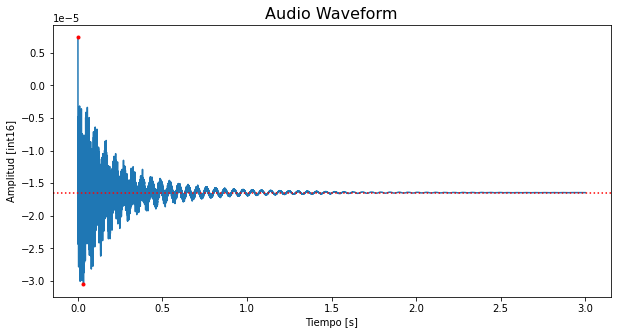

In [24]:
visualizar_datos("audio_RI.wav",(10,5))

In [25]:
""""conclusion: a partir del estudio de los parametros, maximo, minimo y valor promedio, se concluye que las señales no son identicas
y que la respuesta al impulso tiene un margen de error del 9% para el maximo, 30% para el valor minimo y 21% para el valor promedio.""" 

'"conclusion: a partir del estudio de los parametros, maximo, minimo y valor promedio, se concluye que las señales no son identicas\ny que la respuesta al impulso tiene un margen de error del 9% para el maximo, 30% para el valor minimo y 21% para el valor promedio.'

In [26]:
def IR(a1,a2):
    
    
    '''Esta funcion utiliza la información de dos aarvhivos de audio .wav
    y devuelve la respuesta al impulso como un array.
    
    PARAMETROS:
    
    a1 : introduir matriz correspondiente al archivo .wav del sine sweep
    a2 : introducir matriz correspondiente al archivo .wav del filtro inverso.''' 
    
    
    ht = fftconvolve(a1, a2)
    
    #genero audio producto de la convolución
    audio_ht= ht* (2**15 - 1) / np.max(np.abs(ht)) #normalizado del audio
    audio_ht = audio_ht.astype(np.int16) #convierte el archivo a 16-bit data

    sf.write("IR_ht.wav", audio_ht, 44100)
    
    #aca se quiso calcularlo utilizando fourier, pero no se obtuvo el mismo resultado
    #inv_ok = np.append(inv, np.zeros(len(y)-len(inv)))
    #Y = fft(y)
    #INV = fft(inv_ok)
    
    #H = Y / INV    #obs: ver si se pone asi o multiplicar
    #ht = ifft(H)
    
    return ht

In [27]:
#obtengo las matrices para cargarlas en la función
base_data5 = carga_datas_wav('sine_sweep.wav')
base_data6 = carga_datas_wav("filter_inv.wav")

ht = IR(base_data5,base_data6)

LISTO PARA UTILIZAR
LISTO PARA UTILIZAR


In [39]:
reproducir_audio('IR_ht.wav')

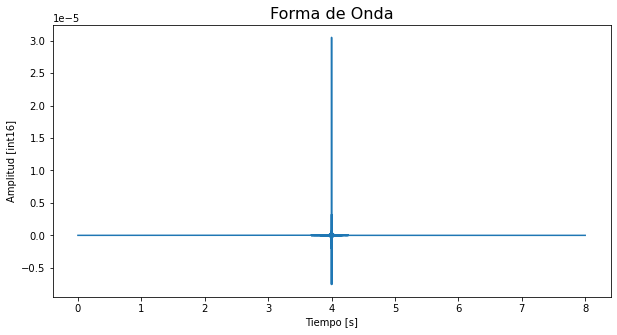

In [29]:
visual_wave_audio("IR_ht.wav",(10,5))

In [31]:
"la función presenta pre-ringing, son pequeás oscilaciones que aparecen en la señal al aplicar el filtro inverso, cuando realemte deberia obteneruna delta de dirac"

'la función presenta pre-ringing, son pequeás oscilaciones que aparecen en la señal al aplicar el filtro inverso, cuando realemte deberia obteneruna delta de dirac'

In [32]:
def filtros(audio,fc,grado=2):
    
    """Esta función realiza fitrado de una señal, y devuelve archivos .wav para cada frecuencia central.
    
    PARAMETROS:
    
    audio: Ingrese un array con la data de la señal de audio a procesar.
    
    fc : seleccione las frecuencias centrales que usara el filtro. "octavas" o "tercio_octavas.."
    
    grado : indique el grado del filtro, por default grado=2."""
    
    
    G_octava = 1.0/2.0
    factor_octava = np.power(2, G_octava)
    G_tercio = 1.0/6.0
    factor_tercio = np.power(2, G_tercio)
    fs = 44100
    
    fc_octavas = [31.25, 62.5, 125, 250, 500, 1000, 2000, 4000, 8000]
    fc_tercio_octavas = [19.69, 24.8, 31.25, 39.37, 49.61, 62.5, 78.75, 99.21, 
                                    125, 157.5, 198.4, 250, 315, 396.9, 500, 630, 793.7, 1000, 1260, 
                                    1587, 2000, 2520, 3175, 4000, 5040, 6350, 8000, 10079, 12699, 16000]
    if fc == "octavas":
        for i in fc_octavas:
            #calculo frecuencias de corte
            lowerCutoffFrequency_Hz = i / factor_octava
            upperCutoffFrequency_Hz = i * factor_octava
        
            #calcula coeficientes del filtro
            b,a = iirfilter(grado, [lowerCutoffFrequency_Hz, upperCutoffFrequency_Hz],
                                rs=60, btype='band', analog=False,
                                ftype='butter', fs=fs, output='ba')
        
            #w, h = signal.freqz(b,a)
        
            #aplica filtro
            filtro = lfilter(b, a, audio)
        
            #Generación de archivo de audio .wav
            filename = 'filtro'+str(i)+"[Hz]_grado"+str(grado)+".wav"
            write(filename, fs, filtro)
            
            
    if fc =="tercio_octavas":    
        for i in fc_tercio_octavas:
            #calculo frecuencias de corte
            lowerCutoffFrequency_Hz = i / factor_tercio;
            upperCutoffFrequency_Hz = i * factor_tercio;
            
            #calcula coeficientes del filtro   
            b,a = iirfilter(grado, [lowerCutoffFrequency_Hz, upperCutoffFrequency_Hz],
                                rs=60, btype='band', analog=False,
                                ftype='butter', fs=fs, output='ba')
            
            #w, h = signal.freqz(b,a)
       
            #aplica filtro
            filtro = lfilter(b, a, audio)
        
            #Generación de archivo de audio .wav
            filename = 'filtrotercio'+str(i)+"[Hz]_grado"+str(grado)+".wav"
            write(filename, fs, filtro)
            
    print("proceso realizado con exito, verifique los archivos de audio con un analizador de espectro")
    
    return 
        

In [33]:
#obtengo la matriz del ruido rosa, arbitrrariamente elijo dicho sonido para filtrar (tiene la particularidad de que responde en todo el espectro de frecuencia audibles)
base_data7 = carga_datas_wav("pink_noise.wav")

LISTO PARA UTILIZAR


In [34]:
filtros(base_data7,"octavas",4)

proceso realizado con exito, verifique los archivos de audio con un analizador de espectro


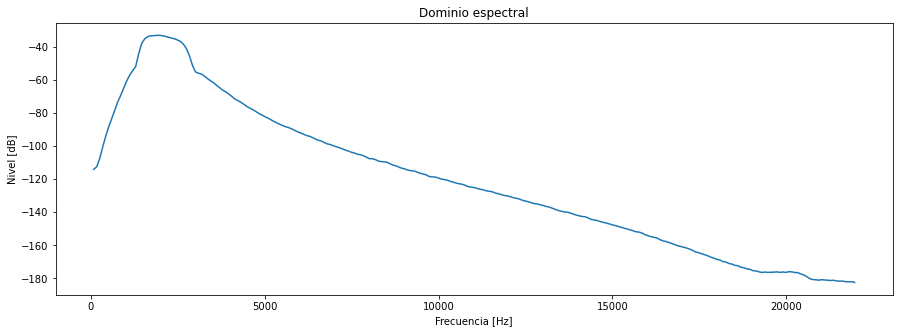

In [35]:
plot_frec("espectro_filtro2000[Hz]_grado4")

In [36]:
filtros(base_data7,"octavas",7)

proceso realizado con exito, verifique los archivos de audio con un analizador de espectro


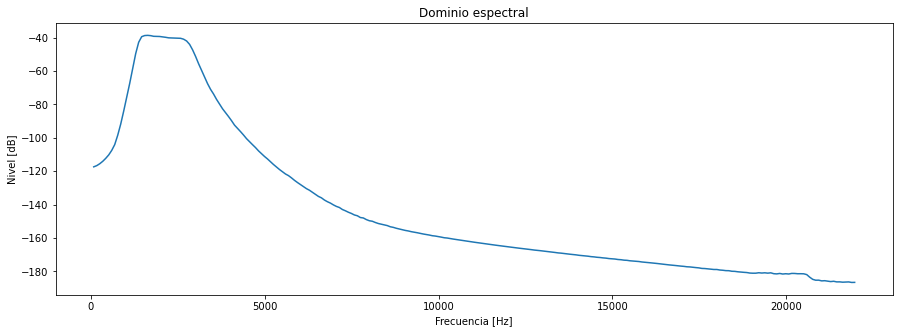

In [37]:
plot_frec("espectro_filtro2000[Hz]_grado7")

In [38]:
"se concluye que a mayor número de grado, mayor será laselectividad del filtro en cuanto a ancho de banda de frecuencias. Aunque acarrea una distrocionde fase asociada en proporcion al grado"

'se concluye que a mayor número de grado, mayor será laselectividad del filtro en cuanto a ancho de banda de frecuencias. Aunque acarrea una distrocionde fase asociada en proporcion al grado'

In [40]:
def log_scale(A, fs=44100):
    """
    Esta funcion genera la conversión de un archivo de audio a escala logarítmica normalizada,
    arroja como salida un nuevo archivo de audio "audio_logscale.wav" y su correspondiente array .
    
    PARAMETROS:
   
    A : NumPy array correspondiente a la señal que se desea transformar.
    fs: int, frecuencia de muestreo en Hz de la señal. Por defecto el valor es 44100 Hz.
    
    
    Datos de la señal generada."""
    
    R = np.array(20*np.log10(A/np.max(A)))
    
    
    # Generación de archivo de audio .wav
    filename = "audio_logscale.wav"
    write(filename, fs, R)
    
    print ("nombre del archivo: audio_logscale.wav")
    
    return R

In [41]:
#obtengo la matriz del archivo de audio
base_data8 = carga_datas_wav("ir_centre_stalls.wav")

LISTO PARA UTILIZAR


In [42]:
log_scale(base_data8)

nombre del archivo: audio_logscale.wav


<ipython-input-40-471568f4281f>:14: RuntimeWarning: divide by zero encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))
<ipython-input-40-471568f4281f>:14: RuntimeWarning: invalid value encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))


array([-62.10187336, -62.10187336, -62.10187336, ...,         -inf,
                nan, -69.14552372])

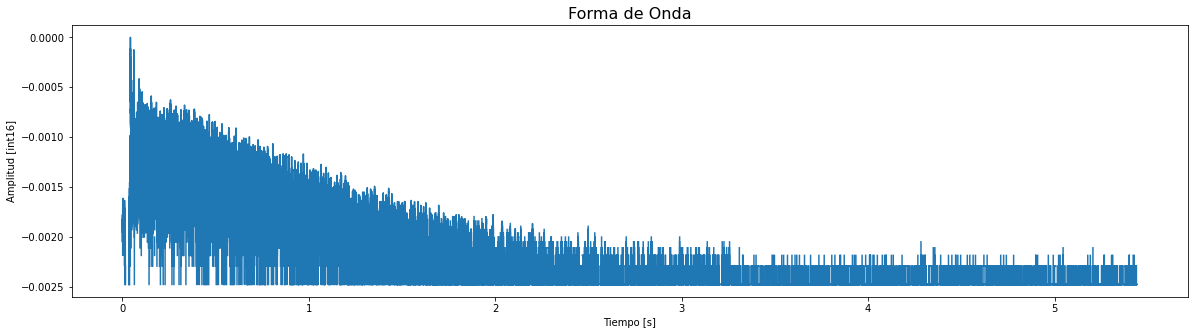

In [43]:
visual_wave_audio("audio_logscale.wav",(20,5))

In [961]:
# A PARITR DE ACA 3RA ENTREGA 

In [74]:
def suavizado(metodo,audio,fs=44100):
    
    '''Esta funcion aplica suavizado a una señal de entrada en formato array
       
     
       metodo : establezca el tipo de suavizado a realizar Hilbert o medfilt
    
       audio : indicar el la matriz correspondiente al audio al cual se le aplicará la transformada
       
       Devuelve un archivo .wav de la señal suavizada.
       
       si metodo = "hilbert" -------> "audio_Sa.wav"
       
       si metodo = "medfilter" ------> "audio_medfilt.wav" '''  
  
    
    if metodo == "hilbert": 
        Sa = hilbert(audio)
        #convierte en archivo audio .wav
        audio_Sa = np.real(Sa) * (2**15 - 1) / np.max(np.abs(Sa)) #normalizado del audio
        audio_Sa = audio_Sa.astype(np.int16) #convierte el archivo a 16-bit 
        sf.write("audio_Sa.wav", audio_Sa, 44100) 
        print("nombre del archivo: audio_Sa.wav")
        
        
    elif metodo == "medfilter": 
        Mf = medfilt(audio)
        #convierte en archivo audio .wav
        audio_medfilt = np.real(Mf) * (2**15 - 1) / np.max(np.abs(Mf)) #normalizado del audio
        audio_medfilt = audio_medfilt.astype(np.int16) #convierte el archivo a 16-bit 
        sf.write("audio_medfilt.wav", audio_medfilt, 44100) 
        print("nombre del archivo: audio_medfilt.wav")
    
    
        return 
        

    

In [82]:
#extraigo datos de la respuesta al impulso mpulseresponseheslingtonchurch-001.wav
base_data4 = carga_datas_wav("impulseresponseheslingtonchurch-001.wav")

LISTO PARA UTILIZAR


In [83]:
suavizado("hilbert",base_data4)

nombre del archivo: audio_Sa.wav


In [84]:
reproducir_audio("audio_Sa.wav")

In [85]:
audio_Sa_Data = carga_datas_wav("audio_Sa.wav")

LISTO PARA UTILIZAR


In [86]:
log_scale(audio_Sa_Data) 

nombre del archivo: audio_logscale.wav


<ipython-input-40-471568f4281f>:14: RuntimeWarning: divide by zero encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))
<ipython-input-40-471568f4281f>:14: RuntimeWarning: invalid value encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))


array([        nan,         nan,         nan, ...,         nan,
       -80.1018935,         nan])

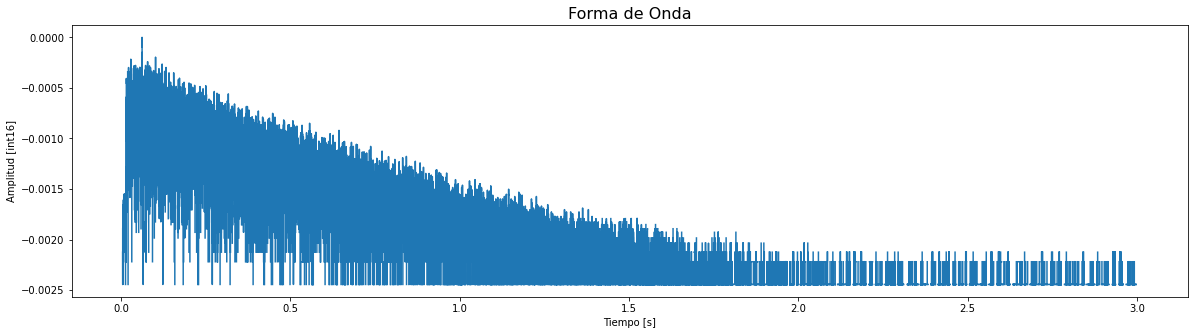

In [87]:
visual_wave_audio("audio_logscale.wav",(20,5))

el maximo valor es:  2.8269365429878235e-05
el minimo valor es:  -1.516006886959076e-05
el valor promedio de la señal es:  -4.237764096133923e-12
--------------------------------------------------
wainting
--------------------------------------------------


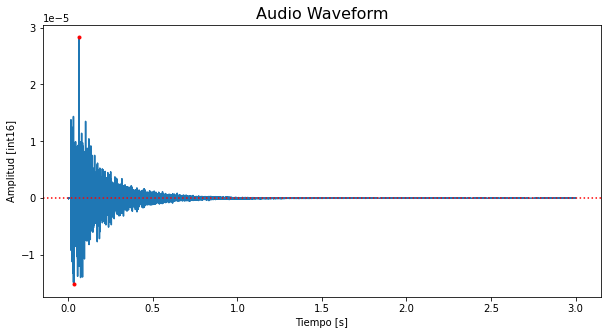

In [88]:
visualizar_datos("audio_Sa.wav",(10,5))

In [970]:
#se prueba utilizando la tecnica de medfilter a la misma señal 

In [89]:
suavizado("medfilter",base_data4)

nombre del archivo: audio_medfilt.wav


In [90]:
reproducir_audio("audio_medfilt.wav")

In [91]:
audio_medfilter_Data = carga_datas_wav("audio_medfilt.wav")

LISTO PARA UTILIZAR


In [92]:
audio_medfilter_Data_logscale = log_scale(audio_medfilter_Data) 

nombre del archivo: audio_logscale.wav


<ipython-input-40-471568f4281f>:14: RuntimeWarning: divide by zero encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))
<ipython-input-40-471568f4281f>:14: RuntimeWarning: invalid value encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))


In [93]:
visual_wave_audio("audio_logscale.wav",(20,5))

el maximo valor es:  3.0516646802425385e-05
el minimo valor es:  -1.9939616322517395e-05
el valor promedio de la señal es:  -1.2736522556702835e-10
--------------------------------------------------
wainting
--------------------------------------------------


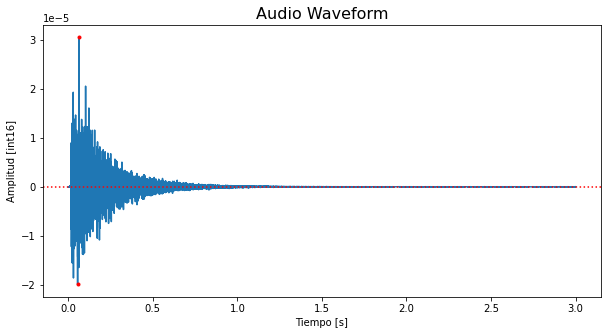

In [94]:
visualizar_datos("audio_medfilt.wav",(10,5),1,1)

In [95]:
"""conclusión: a partir de los datos obtenidos mediante la implementación de la funcion "visualizar_datos", se concluye que 
los resultados al utilizar "hilbert" o "medfilter", son distintos """

'conclusión: a partir de los datos obtenidos mediante la implementación de la funcion "visualizar_datos", se concluye que \nlos resultados al utilizar "hilbert" o "medfilter", son distintos'

In [96]:
def Schroeder_int(matriz,fs=44100):

    """Esta función aplica la integral de Schroeder, la matriz que se le ingrese.
    
    METODO DE APROXIMACIÓN DE LA INTEGRAL:
    formulas  de cuadratura de newton-cotes compuestas (formula del punto medio compuesta)

    PARAMETROS: 
     
    matriz : array correspondiente a la señal de audio.
    
    fs : sample rate, por default 44100."""
    
    
    t = len(matriz/fs)
    muestras = t*fs
    i_inf1 = 0
    i_sup1 = t*1000 #lo multiplica por 1000 para hacer tender el indice superio de la integral a un numero grande en comparacion a la duración del audio.
    h1 = (i_sup1 - i_inf1)/muestras


    integrate1 = h1*np.cumsum(matriz[::-1]**2)
    #integrate1 = np.cumsum(matriz[::1]**2)

    #esto por si es necesario considerar la integral de 0 a t
    #tengo que definir T
    #T = len(matriz)
    #i_inf2 = 0
    #i_sup2 = T
    #h2 = (i_sup2 - i_inf2)/muestras
    #integrate2 = h2*np.cumsum(matriz**2)



    #hay que hacer esto para que lo grafique "bien". 
    integrate_sch = integrate1[::-1]
    
    #integrate_sch = integrate1 - integrate2
    #integrate_sch = integrate_sch[::-1]

    #grafica resultados
    length = integrate_sch.shape[0]/fs
    time = np.linspace(0., length, integrate_sch.shape[0])
    plt.rcParams['figure.figsize'] = (10,5) # set plot size
    plt.scatter(time,integrate_sch)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [dB]")

    return integrate_sch






In [97]:
integrate_sch  = Schroeder_int(audio_medfilter_Data)

In [98]:
base_data11 = log_scale(integrate_sch)

nombre del archivo: audio_logscale.wav


<ipython-input-40-471568f4281f>:14: RuntimeWarning: divide by zero encountered in log10
  R = np.array(20*np.log10(A/np.max(A)))


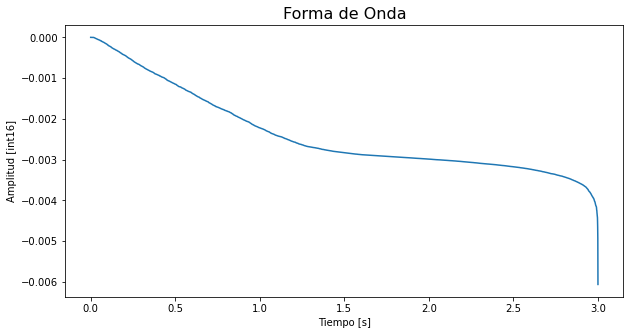

In [99]:
visual_wave_audio("audio_logscale.wav",(10,5))

In [60]:
print(base_data11)

[ 0.00000000e+00 -1.42631892e-07 -4.11464948e-07 ... -1.92546634e+02
 -1.98567234e+02            -inf]


In [100]:
def min_squares(matriz,fs=44100):
    
    """Esta función calcula la regreción lineal de una base de datos insertada.
     
       PARAMETROS: 
     
       matriz: array correspondiente a los resultados de cierta medición/comportamiento.
       
       fs: sample rate, por default 44100"""
    

    
    #esto elimina todo los "-inf" producto de que la función conversión a escala logaritmica genera log(0) = -inf
    matriz2 = np.delete(matriz,np.where(matriz == np.log10(0)))
    #matriz2 = matriz
    
    
    n = len(matriz2) #cantidad de datos de la matriz
    lenght = n/fs #duracion en segundos
    time = np.linspace(0.,lenght,n)

    sumY = np.sum(matriz2)
    sumX = np.sum(time)
    sumY2 = np.sum(matriz2**2)
    sumX2 = np.sum(time**2)
    sumXY = np.sum(matriz2*time)
    promedio_X = sumX/n
    promedio_Y =sumY/n

    #estimación de la recta de ajuste
    m = (sumX*sumY - n*sumXY) / (sumX**2 - n*sumX2)
    b = promedio_Y - m*promedio_X
    recta_ajuste = m*time + b 

    #calculo de desviación estandar (R)
    σx = np.sqrt((sumX2/n) - promedio_X**2)
    σy = np.sqrt((sumY2/n) - promedio_Y**2)
    σxy = (sumXY/n) - promedio_X*promedio_Y
    R = (σxy/(σx*σy))**2

    print ("desviación estandar promedio: ",R)
    
    print("-"*30)
    print("wainting")
    print("-"*30)

    plt.plot(time,matriz2)
    plt.plot(time,recta_ajuste)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [dBFs]")
    
    return 

<ipython-input-100-56ebad1b0926>:14: RuntimeWarning: divide by zero encountered in log10
  matriz2 = np.delete(matriz,np.where(matriz == np.log10(0)))


desviación estandar promedio:  0.8767362253151612
------------------------------
wainting
------------------------------


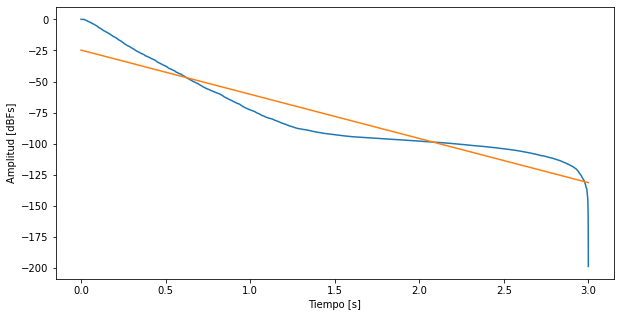

In [101]:
#aplico minimos cuadrados a la matriz que corresponde a la integral de schroeder en scala logaritmica
min_squares(base_data11)

In [70]:
"""conclusión: el ajuste no es ideal, posiblemente porque deberia indicarse que estudie la pendiente inical y no la totalidad.
   Usando la función de Lundeby posiblemente la recta se aproxime mejor, ya que permite discriminar el ruidode fondo de la señal a procesar"""

'conclusión: el ajuste no es ideal, posiblemente porque deberia indicarse que estudie la pendiente inical y no la totalidad.\n   Usando la función de Lundeby posiblemente la recta se aproxime mejor, ya que permite discriminar el ruidode fondo de la señal a procesar'

In [ ]:
La integración numérica de la caída
experimental se interrumpe por el ruido
de fondo que interviene en la parte final
de la caída.